In [1]:
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
import matplotlib
matplotlib.rcParams["font.size"] = 16

In [4]:
# from here: http://data-cityofmadison.opendata.arcgis.com/datasets/tax-parcels-assessor-property-information
df = pd.read_csv("Tax_Parcels_Assessor_Property_Information.csv.gz")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (9,30,44,45,84,85,109,114,116,127,128,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
dict(df.iloc[0])

{'OBJECTID': 1,
 'Parcel': 60801101019,
 'XRefParcel': 60801101019,
 'Address': '2001 Rae Ln',
 'DateParcelChanged': '2019-04-09T00:00:00.000Z',
 'PropertyClass': 'Residential',
 'PropertyUse': 'Single family',
 'AssessmentArea': 1,
 'AreaName': 'Meadowood',
 'MoreThanOneBuild': nan,
 'HomeStyle': 'Ranch',
 'DwellingUnits': 1,
 'Stories': 1.0,
 'YearBuilt': 1960,
 'Bedrooms': 3,
 'FullBaths': 1,
 'HalfBaths': 2,
 'TotalLivingArea': 1371,
 'FirstFloor': 1371,
 'SecondFloor': 0,
 'ThirdFloor': 0,
 'AboveThirdFloor': 0,
 'FinishedAttic': 0,
 'Basement': 1254,
 'FinishedBasement': 686,
 'ExteriorWall1': 'Wood',
 'ExteriorWall2': nan,
 'Fireplaces': 1,
 'CentralAir': 'YES',
 'PartialAssessed': nan,
 'AssessedByState': nan,
 'CurrentLand': 66000,
 'CurrentImpr': 148500,
 'CurrentTotal': 214500,
 'PreviousLand': 61700,
 'PreviousImpr': 145500,
 'PreviousTotal': 207200,
 'NetTaxes': 4400.41,
 'SpecialAssmnt': 0.0,
 'OtherCharges': 84.39,
 'TotalTaxes': 4484.8,
 'LotSize': 14270.0,
 'Zoning1': 

In [6]:
df["PropertyUse"].value_counts()

Single family           47257
Condominium             17027
2 Unit                   3252
Vacant                   2924
Agricultural             1469
4 unit Apartment          936
Commercial exempt         914
3 unit Apartment          579
Condominium -other        573
Office 2 sty or lg.       302
Warehouse & office        261
8 unit Apartment          234
Store 1 sty sm            232
Condominium-notation      207
Apartment & store         190
Condominium -office       150
Office - 1 story          137
Manufacturing             136
6 unit Apartment          133
Warehouse 1 story         125
5 unit Apartment          125
M-1 vacant                 99
Shop center neighbor       96
Condominium -apt           76
C-2 parking lot            75
Condo -store/retail        75
Restaurant                 72
Pud vacant                 66
C-2 vacant                 57
Bank, s & l                56
                        ...  
362 unit Apartment          1
R-3 vacant                  1
85 unit Ap

In [43]:
props = df[df["PropertyUse"].isin(["Single family", "Condominium"]) & (df["YearBuilt"] > 0)].copy()
len(props)

58592

In [44]:
props["house"] = (props["PropertyUse"] == "Single family").astype(int)

In [45]:
props.head()

,OBJECTID,Parcel,XRefParcel,Address,DateParcelChanged,PropertyClass,PropertyUse,AssessmentArea,AreaName,MoreThanOneBuild,...,StormOutfall,FireDemandZone,FireDemandSubZone,PropertyChangeDate,MaxConstructionYear,XCoord,YCoord,SHAPESTArea,SHAPESTLength,house
0,1,60801101019,60801101019,2001 Rae Ln,2019-04-09T00:00:00.000Z,Residential,Single family,1,Meadowood,NaN,...,SR01A106,0,0,NaN,1960,794441.345330,467139.338420,14249.096039,489.040149,1
1,2,60801101027,60801101027,2005 Rae Ln,2019-04-04T00:00:00.000Z,Residential,Single family,1,Meadowood,NaN,...,SR01A106,0,0,NaN,1959,794440.808870,467045.115629,14681.969330,520.009834,1
2,3,60801101035,60801101035,2009 Rae Ln,2019-04-04T00:00:00.000Z,Residential,Single family,1,Meadowood,NaN,...,SR01A106,0,0,NaN,1959,794423.272923,466958.978924,16969.476318,553.207541,1
3,4,60801101043,60801101043,2013 Rae Ln,2019-04-04T00:00:00.000Z,Residential,Single family,1,Meadowood,NaN,...,SR01A106,0,0,NaN,1962,794362.600613,466893.346395,15697.005707,536.686536,1
4,5,60801101051,60801101051,2017 Rae Ln,2019-04-04T00:00:00.000Z,Residential,Single family,1,Meadowood,NaN,...,SR01A106,0,0,NaN,1959,794290.771276,466844.966746,13508.510498,489.774768,1


In [62]:
var1 = "Bedrooms"
var2 = "FullBaths"

In [63]:
dataset = props[[var1, var2, "house"]]
houses = dataset[dataset["house"] == 1]
condos = dataset[dataset["house"] == 0]
len(houses), len(condos)

(47232, 11360)

In [64]:
len(houses) / (len(houses) + len(condos))

0.8061168760240306

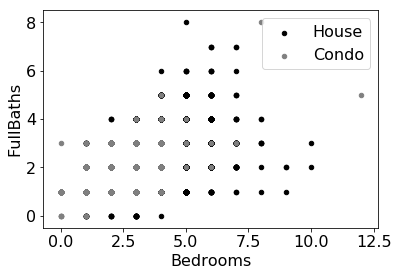

In [65]:
ax = houses.plot.scatter(x=var1, y=var2, color="black", label="House")
condos.plot.scatter(x=var1, y=var2, color="gray", label="Condo", ax=ax)

In [66]:
dataset.head()

,Bedrooms,FullBaths,house
0,3,1,1
1,4,1,1
2,3,1,1
3,3,2,1
4,3,2,1


In [67]:
X = dataset.iloc[:, :-1].values
X

array([[3, 1],
       [4, 1],
       [3, 1],
       ...,
       [3, 2],
       [3, 2],
       [4, 4]])

In [68]:
Y = dataset["house"].values
Y

array([1, 1, 1, ..., 1, 1, 0])

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, stratify=Y)

In [71]:
len(X_train), len(X_test)

(29296, 29296)

In [72]:
lr = LogisticRegression(solver='lbfgs')

In [73]:
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
import numpy as np

In [75]:
pd.Series(lr.predict(X_test) == Y_test).value_counts()

True     25663
False     3633
dtype: int64

In [76]:
lr.score(X_test, Y_test)

0.8759898962315674

In [79]:
for baths in range(5):
    for beds in range(5):
        print(baths, beds, lr.predict([[baths, beds]]))
    print()

0 0 [0]
0 1 [0]
0 2 [0]
0 3 [0]
0 4 [0]

1 0 [0]
1 1 [0]
1 2 [0]
1 3 [0]
1 4 [0]

2 0 [1]
2 1 [1]
2 2 [0]
2 3 [0]
2 4 [0]

3 0 [1]
3 1 [1]
3 2 [1]
3 3 [1]
3 4 [1]

4 0 [1]
4 1 [1]
4 2 [1]
4 3 [1]
4 4 [1]

